# Physique nucléaire 


## A partir du fichier de masses issus du [`Atomic Mass Data Center`](https://www-nds.iaea.org/amdc/)  calculez
- la masse d'un noyau (au choix)
- comparer la masse d'un noyau avec la somme des masses de ses constituants (neutrons + protons)

In [1]:
masse_neutron_u = 1.00866491588  # Masse d'un neutron en u
masse_proton_u = 1.007276466621  # Masse d'un proton
masse_electron_u = 5.48579909070e-4  # Masse d'un électron en u

# Francium Z = 87 N = 133 A = 220
# 1N-Z    N    Z   A  EL    O     MASS EXCESS           BINDING ENERGY/A        BETA-DECAY ENERGY               ATOMIC MASS
#                                    (keV)                  (keV)                    (keV)                        (micro-u)
#   46  133   87  220 Fr   -a   11482.332       4.028      7709.7430     0.0183  B-   1210.2406     8.4809  220 012326.789       4.324
Z=87
N=133
A=Z+N
E=87
masse_noyau_u = 220012326.789e-6 - E * masse_electron_u

masse_theorique_u = N * masse_neutron_u + Z * masse_proton_u 

print("Masse théorique (u) :{:.6f} u".format(masse_theorique_u))
print("Masse réelle (u)    :{:.6f} u".format(masse_noyau_u))
print("Ecart de masse (u)  :{:.6f} u".format(masse_noyau_u - masse_theorique_u))
print("Ecart relatif       :{:.6f} %".format((masse_noyau_u - masse_theorique_u) / masse_noyau_u * 100))

Masse théorique (u) :221.785486 u
Masse réelle (u)    :219.964600 u
Ecart de masse (u)  :-1.820886 u
Ecart relatif       :-0.827809 %


## Calculer l’énergie de liaison B(A,Z) du noyau choisi

In [2]:
c=299792458  # m/s
u_to_kg= 1.6605387310e-27
energie_de_liaison_J = Z*masse_proton_u*u_to_kg*c**2 + N*masse_neutron_u*u_to_kg*c**2 - masse_noyau_u*u_to_kg*c**2
energie_de_liaison_keV = energie_de_liaison_J / 1.60218e-16

print("Energie de liaison :{:.2e} keV".format(energie_de_liaison_keV))

Energie de liaison :1.70e+06 keV


## Calculer l’énergie de liaison par nucléon

In [3]:
energie_de_liaison_unitaire_keV = energie_de_liaison_keV/A
print("Energie de liaison unitaire :{:.2e} keV".format(energie_de_liaison_unitaire_keV))

Energie de liaison unitaire :7.71e+03 keV


## Exprimez le bilan énergétique en fonction de l’énergie de liaison

$Q=(m_i-m_f)c^2=(Z_im_{p}c^2+N_im_{n}c^2-B_i(A,Z))-(Z_fm_{p}c^2+N_im_{n}c^2-B_f(A,Z))=(Z_i-Z_f)m_p c^2 + (N_i-N_f)m_n c^2 + B_f(A,Z)-B_i(A,Z)= B_f(A,Z)-B_i(A,Z)$ car on conserve le nombre de protons et de neutrons.

## Calculer le bilan énergétique des réactions suivantes 

- $^{2}_1H + ^{3}_1H \rightarrow ^{4}_2He + n$  
  B(2,1) / A = 1.11 MeV  
  B(3,1) / A = 2.83 MeV  
  B(4,2) / A = 7.07 MeV
  
- $^{235}_{92}U + n \rightarrow ^{92}_{36}Kr + ^{141}_{56}Ba + 3n$   
  B(92,36) / A = 8.51 MeV  
  B(141,56) / A  = 8.33 MeV  
  B(235,92) / A = 7.59 MeV


In [ ]:
# Q=(mi-mf)*c^2 = (Bf-Bi)

# Première réaction 

Bi_MeV=2*1.11+3*2.83
Bf_MeV=4*7.07
Q_fusion=Bf_MeV-Bi_MeV

print("Bilan d'énergie Fusion {:.3e} MeV".format(Q_fusion))

# Deuxième réaction U+n=Kr+Ba+3n

Bi_MeV=7.59*235
Bf_MeV=8.33*141+8.51*92
Q_fission=Bf_MeV-Bi_MeV

print("Bilan d'énergie Fission {:.3e} MeV".format(Q_fission))

Bilan d'énergie Fusion 1.757e+01 MeV
Bilan d'énergie Fission 1.738e+02 MeV


## Calculez l'énergie libérée en MJ/kg pour 1kg d'$^{235}U$.  
   - 1 fission libère en moyenne $\sim$ 200 MeV  
   - Masse Atomique : 235,0439299 u  
   
   Comparer au pouvoir calorifique:   
   - Pétrole (Essence) : 47 MJ/kg  
   - Charbon : 20 MJ/kg  


In [ ]:
masse_uranium_kg = 1.0
masse_atomique_u=235.0439299
mol_uranium = masse_uranium_kg / (masse_atomique_u * u_to_kg)

Q_fission=200
energie_libere_MeV=mol_uranium * Q_fission
energie_libere_J=energie_libere_MeV*1e6*1.60e-19

print("Energie libérée : {:.3e} MJ".format(energie_libere_J/1e6))
# L'énergie libérée est bien supérieure à celle du pétrole et du charbon.

Energie libérée : 8.199e+07 MJ


## Radioactivité 

Prenons la chaine de décroissance : $^{131}Te \rightarrow ^{131}I \rightarrow ^{131}Xe$  
Périodes respectives : 30 heures et 8 jours.  
Ecrire les équations d'évolutions, les résoudre et les tracer en fonction du temps.   

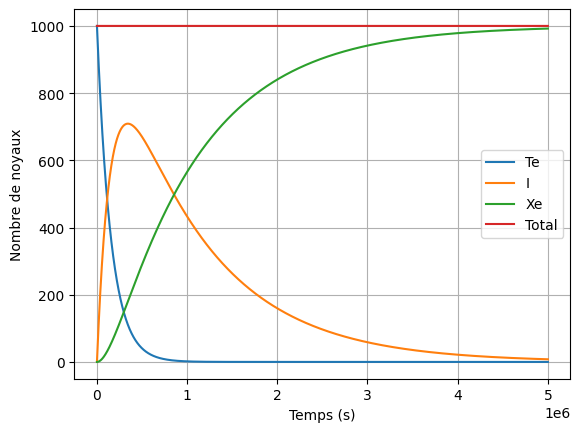

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,5e6,100000)

Te0=1000
T_Te_s=30*3600
T_I_s=8*24*3600

lambda_Te=np.log(2)/T_Te_s
lambda_I=np.log(2)/T_I_s

Te=Te0*np.exp(-lambda_Te*t)


beta=Te0*lambda_Te/(lambda_I-lambda_Te)

I=beta*(np.exp(-lambda_Te*t)-np.exp(-lambda_I*t))

Xe=lambda_I*beta*(-np.exp(-lambda_Te*t)/lambda_Te + np.exp(-lambda_I*t)/lambda_I) + Te0

plt.plot(t,Te,label='Te')
plt.plot(t,I,label='I')
plt.plot(t,Xe,label='Xe')
plt.plot(t,Te+I+Xe,label='Total')
plt.xlabel('Temps (s)')
plt.ylabel('Nombre de noyaux')
plt.legend()
plt.grid()
plt.show()


La quantité de matière se conserve. $T_e$ ne fait que diminuer, $I$ croit puis se désintègre et $X_e$ ne fait que croitre. 

# Exercices

1. Calculer l’énergie de liaison d’une particule $\alpha$, sachant que sa masse vaut 4.0015u

In [7]:
masse_alpha_u = 4.00260325413
masse_neutron_u = 1.00866491588
masse_proton_u = 1.007276466621
u_to_kg= 1.6605387310e-27 # kg
c=299792458  # m/s
J_to_eV=1.60218e-19  # J/eV

# Alpha Helium Z=2 N=2 A=4
Z_alpha=2
N_alpha=2
A_alpha=Z_alpha+N_alpha

defaut_masse_he_u = N_alpha * masse_neutron_u + Z_alpha * masse_proton_u - masse_alpha_u # calcul du défaut de masse
print("Défaut de masse He :{:.2e} u".format(defaut_masse_he_u))

energie_de_liaison_J = defaut_masse_he_u * u_to_kg * c**2 # E=mc^2
energie_de_liaison_MeV = energie_de_liaison_J / J_to_eV / 1e6 # conversion en MeV
print("Energie de liaison He :{:.2e} MeV".format(energie_de_liaison_MeV))
print("Energie de liaison unitaire He :{:.2e} MeV".format(energie_de_liaison_MeV/A_alpha))

Défaut de masse He :2.93e-02 u
Energie de liaison He :2.73e+01 MeV
Energie de liaison unitaire He :6.82e+00 MeV


2. On considère des ensembles de 3 protons et 3 neutrons répartis de 3 façons différentes :
- cas 1 : 6 nucléons pris isolément (M1)
- cas 2 : une particule α et un deuton (M2)
- cas 3 : un noyau de lithium 6 (M3)  

Sachant que l’énergie de liaison par nucléon de la particule $\alpha$ est de 7.0739 MeV et que l’énergie de liaison du deuton est de 2.2246 MeV, calculer en u les masses des deux premiers ensembles
L’excès de masse de l’atome de lithium 6 est de 14 .0863 MeV/c2.  
En négligeant l’énergie de liaison des électrons, calculer la masse du noyau de lithium 6.  
Comparer les masses respectives des 3 ensembles. Conclure.  
Calculer l’énergie de liaison par nucléon du lithium 6  

In [8]:
energie_liaison_unitaire_alpha_MeV = 7.0739
energie_liaison_unitaire_deuton_MeV = 2.2246

MeV_to_u = 1e6 * J_to_eV / (u_to_kg * c**2)

Z_Li=3
N_Li=3
A_Li=Z_Li+N_Li


print("Masse 3 protons et 3 neutrons :{:.4f} u".format(3*masse_proton_u + 3*masse_neutron_u)) # masse de 3 protons et 3 neutrons

masse_Li_u = Z_Li * masse_proton_u + N_Li * masse_neutron_u - Z_Li * masse_electron_u # masse de 3 protons et 3 neutrons moins les électrons

print("Masse Li théorique :{:.4f} u".format(masse_Li_u))


masse_alpha_deuteron_u = 3 * masse_proton_u + 3 * masse_neutron_u - 3 * masse_electron_u # Masse de 3 protons et 3 neutrons moins les électrons
masse_alpha_deuteron_u += energie_liaison_unitaire_alpha_MeV*4 * MeV_to_u + energie_liaison_unitaire_deuton_MeV*2 * MeV_to_u # on ajoute l'énergie de liaison

print("Masse alpha + deuteron :{:.4f} u".format(masse_alpha_deuteron_u))

Masse 3 protons et 3 neutrons :6.0478 u
Masse Li théorique :6.0462 u
Masse alpha + deuteron :6.0813 u


Entre la masse de 3 protons + 3 neutrons et celui du noayu de $L_i$, il y a seulement la masse des éléctrons en différence qui est très faible. Par contre, entre la particule $\alpha$ et le Deutetium, l'énergie de liaison ajouute une quantité importante à la masse.

3. Calculer l’activité d’un gramme de radium (A=226, Z=88) de demi-vie T=1620 ans
On prendra B(226,88)=1731.610 MeV.

In [9]:
lambda_radium = np.log(2) / (1620 * 365.24 * 24 * 3600)  # en s^-1

masse_radium_kg = 1e-3 

Z_radium = 88
N_radium = 138
A_radium = Z_radium + N_radium
energie_liaison_MeV = 1731.610

masse_radium_u = Z_radium * masse_proton_u + N_radium * masse_neutron_u - energie_liaison_MeV * MeV_to_u # on calcule la masse du noyau à partir de l'énergie de liaison
nombre_atomes_radium = masse_radium_kg / (masse_radium_u * u_to_kg) # nombre d'atomes dans 1g de radium

print("Activité de 1g de radium :{:.2e} Bq".format(lambda_radium * nombre_atomes_radium)) # Activité qui est le nombre d'atome désintégrés par seconde pour 1g de radium
# = 1 curie = 3.7e10 Bq

Activité de 1g de radium :3.61e+10 Bq


On retrouve l'unité "Curie" qui est définit comme l'activité de 1g de radium et qui vaut 3.7e10 Bq.

4. Chez les être vivants, la teneur en isotope radioactif A=14, Z=6 du carbone est constante.  
Après la mort, cette teneur décroît car les atomes qui se désintègrent ne sont plus remplacés par le phénomène d’assimilation.  
Du charbon de bois recueilli dans la chambre funéraire d’un dolmen à Barnenez a été en 1969 l’objet de l’étude suivante.   
La combustion de quelques grammes de ce charbon de bois fournit 1.2 litre de dioxyde de carbone dont la radioactivité s’exprime par 2.95 désintégrations par minute.  
A quantité égale, la radioactivité de dioxyde de carbone provenant de la combustion de bois actuel se traduit par 6.02 désintégrations par  
minute. Sachant que la période du carbone 14 est de 5600 ans, quelle était la période d’occupation du tumulus de Barnenez ?  

In [10]:
A_carbone_14 = 14
Z_carbone_14 = 6
N_carbone_14 = A_carbone_14 - Z_carbone_14

lambda_carbone_14 = np.log(2) / (5600 * 365.24 * 24 * 3600)  # en s^-1

vitesse_desintegration_carbone_14_s = 2.95 /60

delta_t=np.log10(6.02/2.95)/lambda_carbone_14
print('Date initiale {:.0f}'.format(1969-delta_t/(3600*24*365.24)))

Date initiale -534


On trouve une date de -534 av JC simplement en utilisant la radioactivité du carbone 14.

5. Sachant que l’uranium naturel contient, actuellement, 0.72% d’uranium 235 (pourcentage en nombre de noyaux),  
calculer quel était ce pourcentage il y a deux milliards d’années. 
Quel avantage auraient eu sur nous des ingénieurs vivant à cette époque ?  
[NB : en 1972, on a découvert qu’une réaction en chaîne spontanée avait eu lieu, il y a à peu près deux milliards d’années, dans le gisement d’uranium d’Oklo au Gabon]


$x(t)=\frac{U_{235}}{U_{235}+U_{238}} = \frac{x_0\,\mathrm{e}^{-\lambda_{235}t}}{x_0\,\mathrm{e}^{-\lambda_{235}t}+(1-x_0)\,\mathrm{e}^{-\lambda_{238}t}}$

In [11]:
lambda_uranium_235 = np.log(2) / (7.04e8 * 365.24 * 24 * 3600)  # en s^-1
lambda_uranium_238 = np.log(2) / (4.468e9 * 365.24 * 24 * 3600)  # en s^-1

x0=0.0072  # Fraction initiale en U235
delta_t=-2e09*365.24*24*3600 # négatif car on veut remonter dans le temps
x=x0*np.exp(-lambda_uranium_235*delta_t)/(x0*np.exp(-lambda_uranium_235*delta_t)+(1-x0)*np.exp(-lambda_uranium_238*delta_t))
print('Fraction U235 restante {:.4f} %'.format(x*100))

Fraction U235 restante 3.6701 %


Ansi, la teneur en U235 diminue dans le temps. Si on avait utilisé de l'uranium à l'époque, il y aurait eu moins d'enrichissement à faire.